In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

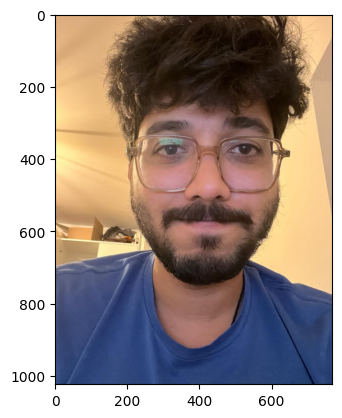

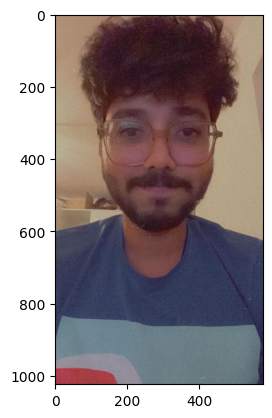

In [29]:
peng_net = cv.imread(r"C:\Users\gokul\Downloads\real_img.jpg", cv.IMREAD_UNCHANGED)
peng_taken = cv.imread(r"C:\Users\gokul\Downloads\snao_msg.jpg", cv.IMREAD_UNCHANGED)
peng_net = cv.cvtColor(peng_net, cv.COLOR_BGR2RGB)
peng_taken = cv.cvtColor(peng_taken, cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(peng_net)
plt.figure()
plt.imshow(peng_taken)

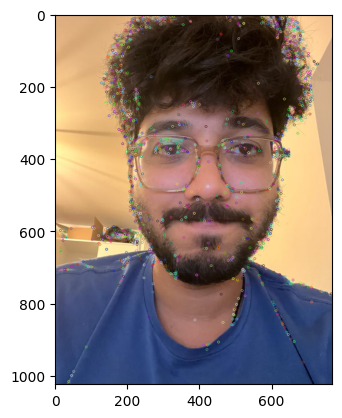

In [30]:
sift = cv.SIFT_create()
sift_kp, sift_desc = sift.detectAndCompute(peng_net, None)
peng_net_withkp = cv.drawKeypoints(peng_net,sift_kp,None)
plt.imshow(peng_net_withkp)

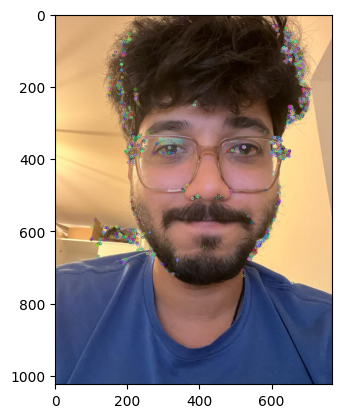

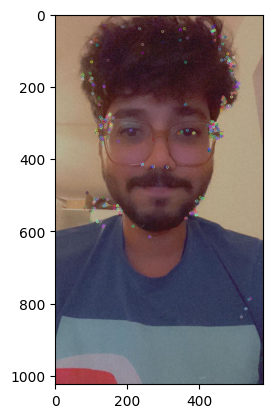

In [31]:
orb = cv.ORB_create(nfeatures = 2000)
orb_kp_net, orb_desc_net = orb.detectAndCompute(peng_net, None)
peng_net_orb = cv.drawKeypoints(peng_net, orb_kp_net, None)
plt.figure()
plt.imshow(peng_net_orb)
orb_kp_taken, orb_desc_taken = orb.detectAndCompute(peng_taken, None)
peng_taken_orb = cv.drawKeypoints(peng_taken, orb_kp_taken, None)
plt.figure()
plt.imshow(peng_taken_orb)

376


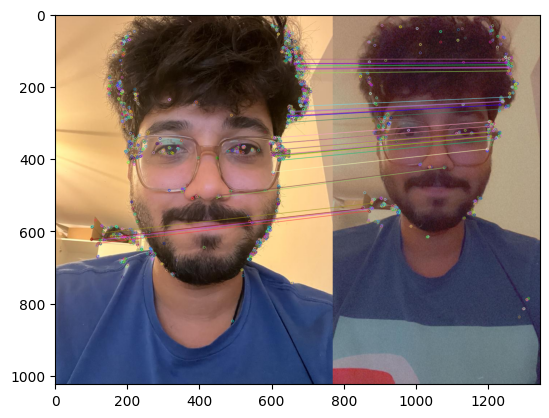

In [34]:
#Brute force
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(orb_desc_net,orb_desc_taken)
print(len(matches))
matches = sorted(matches, key  = lambda x:x.distance)
# for m in matches[:20]:
#     print(m.distance)
matched_result = cv.drawMatches(peng_net,orb_kp_net,peng_taken,orb_kp_taken,matches[:30], None)
plt.imshow(matched_result)